# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

#### Problem Statement

An online news portal aims to expand its business by acquiring new subscribers. It has created a new landing page which it hopes will increase peoples interest and ultimately prompt vistors to subscribe.

To test whether or not this new landing page should replace the old landing page a test is run. 100 users are randomly selected and then divided equally into two groups. One group is asked to visit the old landing page (control group) and the other group is asked to visit the new landing page (treatment group). Various data about user engagement are recorded for both groups. 


#### Objectives


Explore the dataset and extract insights using Exploratory Data Analysis.

Find out if the users are spending more time on the new landing page versus the old landing page.

Find out if the users who visit the new landing page are more likely to subscribe than those who visit the old landing page.

Find out if a user's preferred language is related to how likely someone is to subscribe.

Find out if time spent on the landing page varies depending on the user's preferred language.


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
abtest = pd.read_csv("abtest.csv")

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns and each row corresponds to how much time the users are spending on the website.

In [4]:
abtest.shape

(100, 6)

#### Observations: 
* 100 rows and 6 columns

In [5]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
* There are 2 numeric columns and 4 object type columns.

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
abtest["group"] = abtest.group.astype("category")
abtest["landing_page"] = abtest.landing_page.astype("category")
abtest["converted"] = abtest.converted.astype("category")
abtest["language_preferred"] = abtest.language_preferred.astype("category")

# Use info() to print a concise summary of the DataFrame
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* Converting the object type attributes into category type reduces the memory usage from 4.8+ KB to 2.6 KB.

In [7]:
abtest.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:
* No missing data.

In [8]:
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:
* The minimum time that a user was on the website was about 0.19 minutes
* The average time that a user was on the website was about 5.38 minutes
* The minimum time that a user was on the website was about 10.71 minutes

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

### Test Groups

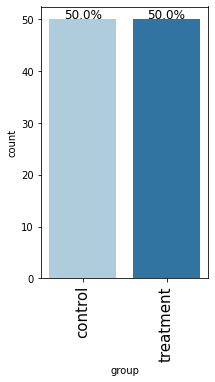

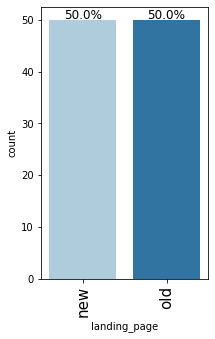

In [12]:
labeled_barplot(abtest,"group",perc=True)
labeled_barplot(abtest,"landing_page",perc=True)

#### Observations:
* Users are equally divided into two groups. The control group and the treatment group. 

### Time spent on the page

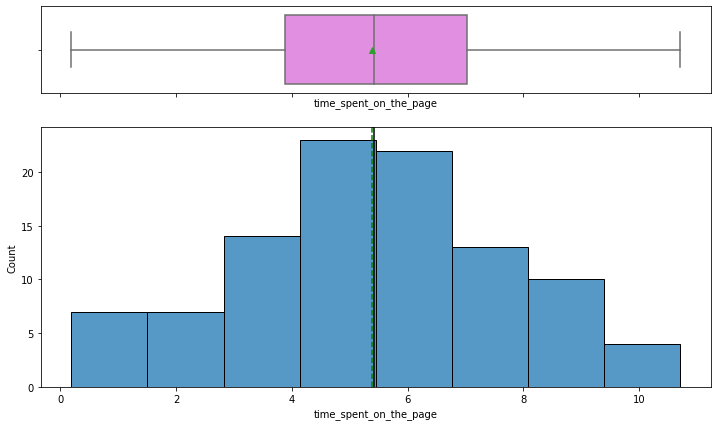

In [13]:
histogram_boxplot(abtest, "time_spent_on_the_page")

#### Observations:
* Time spent on page is normally distributed
* The mean and the median are the same
* There are no outliers

### Where users converted?

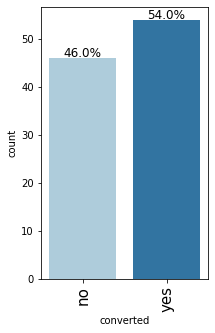

In [14]:
labeled_barplot(abtest,"converted",perc=True)

#### Observations:
* 54% of users were converted to the new landing page. 46% were not.

### Language preferred

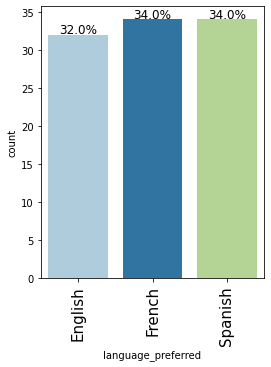

In [15]:
labeled_barplot(abtest,"language_preferred", perc=True)

#### Observations:
* Language preferrence is nearly uniform between the 3 languages.
* English is the least preferred with 32%. 2% less than Spanish and French.

### Bivariate Analysis

### Time spent on the page versus Landing page type

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

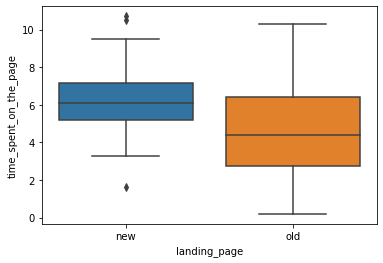

In [16]:
sns.boxplot(data = abtest, y = "time_spent_on_the_page", x = "landing_page")

#### Observations

* Users that visited the new landing page spent more time on the website than those which visited the old landing page.
* On average, the users that visited the new landing page spent approximately 2 minutes more time on the website than those which visited the old landing page.
* There are a few outliers on both sides of the whiskers for the sub-group that visited the new landing page.

### Time spent on the page versus Converted

<AxesSubplot:xlabel='converted', ylabel='time_spent_on_the_page'>

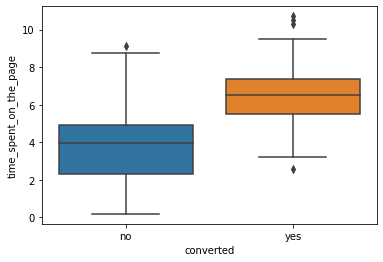

In [17]:
sns.boxplot(data = abtest, y = "time_spent_on_the_page", x = "converted")

#### Observations

* Users that had spent more time on the page where more likely to have been converted. 
* On average, the users where converted had spent approximately 2.5 minutes more time on the page than those which were not converted.
* There are a few outliers on both sides of the whiskers for the sub-group that was converted to the new landing page.
* There was one outlier for the sub-group that was not converted to the new landing page.

### Time spent on the page versus Language Preferred

<AxesSubplot:xlabel='language_preferred', ylabel='time_spent_on_the_page'>

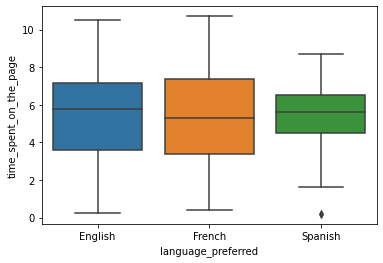

In [18]:
sns.boxplot(data = abtest, y = "time_spent_on_the_page", x = 'language_preferred')

#### Observations

* Mean time spent between the users with different language preferrances was nearly uniform.
* There was one outlier for the Spanish sub-category. 

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

<AxesSubplot:xlabel='landing_page', ylabel='time_spent_on_the_page'>

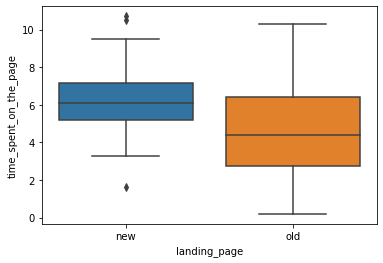

In [19]:
sns.boxplot(data = abtest, y = "time_spent_on_the_page", x = "landing_page")

#### Observations

* Mean time spent for the new landing page appears to be higher than for the old landing page. However, let's confirm this with a hypothesis test.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the time spent on the old landing page and the new landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$

### Step 2: Select Appropriate test

#### Two Independent Sample T-test for Equality of Means - Unequal Std Dev

### Step 3: Decide the significance level

$\alpha$ 0.05 significance level

### Step 4: Collect and prepare data

In [20]:
#Calculating the means and standard deviations for the two independent sample t-test.

old_page_time_mean = abtest[abtest["landing_page"]=="old"].mean(numeric_only=True)
print("The mean time spent on the old landing page is " + str(round(old_page_time_mean["time_spent_on_the_page"],2)))

new_page_time_mean = abtest[abtest["landing_page"]=="new"].mean(numeric_only=True)
print("The mean time spent on the new landing page is " + str(round(new_page_time_mean["time_spent_on_the_page"],2)))

old_page_time_std = abtest[abtest["landing_page"]=="old"].std(numeric_only=True)
print("The standard deviation for the time spent on the old landing page is " + str(round(old_page_time_std["time_spent_on_the_page"],2)))

new_page_time_std = abtest[abtest["landing_page"]=="new"].std(numeric_only=True)
print("The standard deviation for the time spent on the new landing page is " + str(round(new_page_time_std["time_spent_on_the_page"],2)))

The mean time spent on the old landing page is 4.53
The mean time spent on the new landing page is 6.22
The standard deviation for the time spent on the old landing page is 2.58
The standard deviation for the time spent on the new landing page is 1.82


#### Observations

* Standard deviations are not equal, therefore the population standard deviations may be assumed to be different.

In [21]:
#Splitting time spent on page into 2 groups. New landing page and old landing page

old_page = abtest[abtest["landing_page"]=="old"]
new_page = abtest[abtest["landing_page"]=="new"]

### Step 5: Calculate the p-value

In [22]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(old_page["time_spent_on_the_page"], new_page["time_spent_on_the_page"], equal_var = False, alternative = 'two-sided')
print('The p-value is ', p_value)

The p-value is  0.0002784762450333098


### Step 6: Compare the p-value with $\alpha$

In [23]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0002784762450333098 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

### Insight

As the p-value(~0.0003) is less than the level of significance, we can reject the null hypothesis. Hence, we have enough evidence to conclude that the means between time spent on the new landing page versus the old landing page is different at 0.05 significance level.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

In [24]:
abtest_converted_df = abtest[abtest["converted"]=="yes"].copy()

<AxesSubplot:xlabel='landing_page', ylabel='count'>

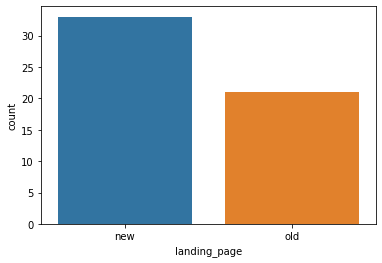

In [25]:
sns.countplot(data = abtest_converted_df, x = 'landing_page')

#### Observations

* The graph seems to suggest that users who visit the new landing page are more likely to be converted. However, let's confirm this with a hypothesis test. 

### Step 1: Define the null and alternate hypotheses

Let $p$ be the proportion of users who were converted after visiting the new landing page.

The researcher will test the null hypothesis

>$H_0:p \leq 0.5$

against the alternate hypothesis

>$H_a:p > 0.5$

### Step 2: Select Appropriate test

#### One proportion z test

### Step 3: Decide the significance level

$\alpha$ 0.05 significance level

### Step 4: Collect and prepare data

In [26]:
#Calculating the means for the one proportion z-test.

old_page_converted = abtest[(abtest["landing_page"]=="old") & (abtest["converted"]=="yes")]
print("Number of users who visited the old landing page and were converted: " + str(old_page_converted["converted"].count()))

new_page_converted = abtest[(abtest["landing_page"]=="new") & (abtest["converted"]=="yes")]
print("Number of users who visited the new landing page and were converted: " + str(new_page_converted["converted"].count()))

Number of users who visited the old landing page and were converted: 21
Number of users who visited the new landing page and were converted: 33


### Step 5: Calculate the p-value

In [27]:
from statsmodels.stats.proportion import proportions_ztest


test_stat, p_value = proportions_ztest(21, 33, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.051716823228504266


### Step 6: Compare the p-value with $\alpha$

In [28]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.051716823228504266 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

### Insight
As the p-value(~0.052) is more than the level of significance, we cannot reject the null hypothesis. Hence, we do not have enough evidence to conclude that the users which visited the new landing page were more likely to be converted compared to the users which visited the old landing page at 0.05 significance level.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

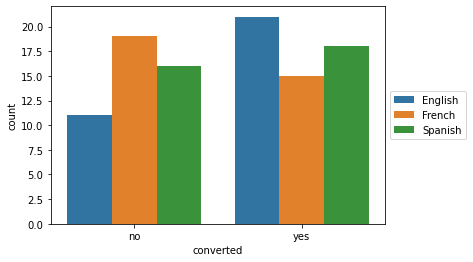

In [29]:
sns.countplot(data=abtest,x="converted",hue="language_preferred")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#### Observations

* The graph does not seems to suggest that a user's language preferrence is related to being converted.
* French users seem to be less likely to be converted, while English users seem to be more likely to be converted, and no trends for Spanish users. This suggests not discernible pattern.
* However, let's confirm this with a hypothesis test. 

### Step 1: Define the null and alternate hypotheses

Null hypothesis

>$H_0:$ Conversion and preferred language are independent.

against the alternate hypothesis

>$H_a:$ Conversion and preferred language are related.

### Step 2: Select Appropriate test

#### Chi-Square Test for Independence

### Step 3: Decide the significance level

$\alpha$ 0.05 significance level

### Step 4: Collect and prepare data

In [30]:
#Reorganizing the excel data sheet for Chi-squared test

abtest_converted_language_data = pd.read_csv("abtest - converted and language.csv")
abtest_converted_language_df = pd.DataFrame(abtest_converted_language_data)
abtest_converted_language_df

,language,no,yes
0,Spanish,16,18
1,English,11,21
2,French,19,15


In [31]:
abtest_converted_language_df.dtypes

language    object
no           int64
yes          int64
dtype: object

### Step 5: Calculate the p-value

In [32]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(abtest_converted_language_df.drop("language", axis = 1))
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [33]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value(~0.21) is more than the level of significance, we cannot reject the null hypothesis. Hence, we do not have enough evidence to conclude that converted users are related to language preferred at 0.05 significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

In [34]:
page_language_df = abtest[abtest["landing_page"]=="new"]

Text(0, 0.5, 'time_spent_on_the_new_landing_page')

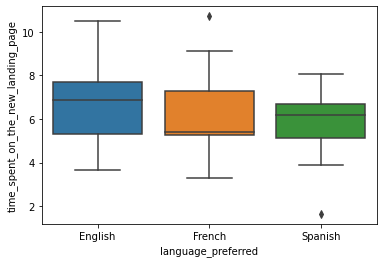

In [35]:
sns.boxplot(data = page_language_df, y = "time_spent_on_the_page", x = 'language_preferred')
plt.ylabel("time_spent_on_the_new_landing_page")

#### Observations

* The graph does not seems to suggest that a user's language preferrence is related to time being spent on the new landing page. However, let's confirm this with a hypothesis test. 

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for English, French, and Spanish users respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the preferred languages is spending time differently on the landing page from the rest.

### Step 2: Select Appropriate test

#### One-way ANOVA test

### Step 3: Decide the significance level

$\alpha$ 0.05 significance level

### Step 4: Collect and prepare data

In [36]:
page_language_df.groupby("language_preferred")["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 5: Testing for normality using Shapiro-Wilk's test

We will test the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [37]:
from scipy import stats

w, p_value = stats.shapiro(page_language_df["time_spent_on_the_page"]) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Step 6: Testing for equality of variance using Levene test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [38]:
from scipy.stats import levene
statistic, p_value = levene(page_language_df["time_spent_on_the_page"][page_language_df["language_preferred"]=="English"], 
                                   page_language_df["time_spent_on_the_page"][page_language_df["language_preferred"]=="French"], 
                                   page_language_df["time_spent_on_the_page"][page_language_df["language_preferred"]=="Spanish"])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Step 7: Calculate the p-value

In [39]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(page_language_df.loc[page_language_df["language_preferred"] == "English", "time_spent_on_the_page"],
                              page_language_df.loc[page_language_df["language_preferred"] == "French", "time_spent_on_the_page"],
                              page_language_df.loc[page_language_df["language_preferred"] == "Spanish", "time_spent_on_the_page"])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 8: Compare the p-value with $\alpha$

In [40]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 9:  Draw inference

As the p-value(~0.43) is more than the level of significance, we cannot reject the null hypothesis. Hence, we do not have enough evidence to conclude that at least one of the preferred languages is spending time differently on the landing page from the rest. at 0.05 significance level.

## Conclusion and Business Recommendations

#### Conclusion

Users spent more time on the new landing page versus the old landing page. 

The users who visit the new landing page were not more likely to subscribe than those who visit the old landing page.

User's preferred language is independent from how likely someone is to subscribe.

Time spent on the landing page does not vary depending on the user's preferred language.

#### Business Recommendations

Users spending more time on the new landing page versus the old landing page is a indicator that the new landing page is a improvement on the old landing page. 

Although users who visit the new landing page were not more likely to subscribe than those who visit the old landing page, the graph does show that users who visited the landing page were more likely to subscribe. But not at a 5% significance level. It would be recommended to re-test this hypothesis but with a larger sample size. A larger sample will provide results with a smaller margin of error. 